### 1. Carregando Bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import cifar10
from keras.models import Sequential,load_model
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, AveragePooling2D
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint   
from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import  to_categorical
import tensorflow as tf



In [2]:
# Funções Auxiliares
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training Accuracy')
    plt.plot(x, val_acc, 'r', label='Validation Accuracy')
    plt.title('Training and validation Accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

### 2. Carregando o dataset pré-embaralhado de treinamento bem como os dados de teste

In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


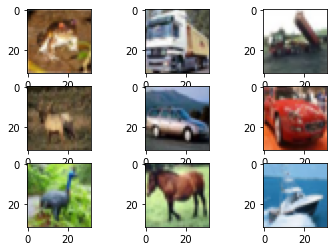

In [4]:
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))
# plot first few images
for i in range(9):
	# define subplot
	plt.subplot(330 + 1 + i)
	# plot raw pixel data
	plt.imshow(x_train[i])
# show the figure
plt.show()

### 3. Redimensionando as imagens e dividindo cada pixel em cada imagem por 255

In [5]:
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

### 4.  Dividindo o dataset em treinamento, teste e validação

"One-hot encoding" aplicado aos rótulos


In [6]:
num_classes = len(np.unique(y_train))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [8]:
num_classes

10

divindo dataset de treinamento em treinamento, teste e validação - Apenas para exemplo em um ambiente real as amostras devem ser seleciondas de forma aleatória

In [9]:
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

Impressão da forma do conjunto de treino

In [10]:
print('x_train shape:', x_train.shape)

x_train shape: (45000, 32, 32, 3)


In [11]:
print('x_valid shape:', x_valid.shape)

x_valid shape: (5000, 32, 32, 3)


Impressão do número de imagens nos datasets de treinamento, teste e validação

In [12]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

45000 train samples
10000 test samples
5000 validation samples


### 5. Definindo a arquitetura do modelo (IMPORTANTE!)

*   2 camadas convolucionais de tamanho progressivamente crescente
*   Máximo de camadas de "pooling" (2x2) seguidas por tais 3 camadas convolucionais
*   Uma camada do tipo totalmente conectada de 120 neurônios
*   Uma camada do tipo totalmente conectada de 84 neurônios
*   Ultimas camadas do tipo totalmente conectadas de 10 saídas (10 classes de categoria de imagem)
*   "Dropout" de 0,2-0,3







In [31]:
model = Sequential()
model.add(Conv2D(filters=6, kernel_size=5,  activation='relu', input_shape=(32, 32, 3)))                        
model.add(AveragePooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=16, kernel_size=5,  activation='relu'))
model.add(AveragePooling2D(pool_size=2))
model.add(Dropout(0.3))
#model.add(Conv2D(filters=120, kernel_size=5,  activation='relu'))
#model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(240, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(120, activation='tanh'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))


Tentem executar a rede configurando outras funções de ativação (como visto em nossa Aula 3)
mais informações em https://keras.io/activations/

In [55]:
#plot_model(model, show_shapes=True, show_layer_names=True)

### 6. Compilando o modelo

In [32]:
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
                  

### 7. Treinando o modelo

In [33]:
checkpointer = ModelCheckpoint(filepath='./modelo_mlp_ex6.hdf5', verbose=0,  save_best_only=True, monitor='val_accuracy') #
                              
history = model.fit(x_train, y_train, batch_size=128 , epochs=400, validation_data=(x_valid, y_valid), callbacks=[checkpointer], verbose=0)

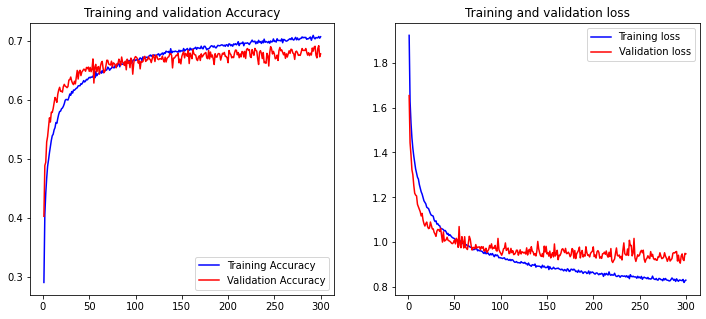

In [27]:
plot_history(history)

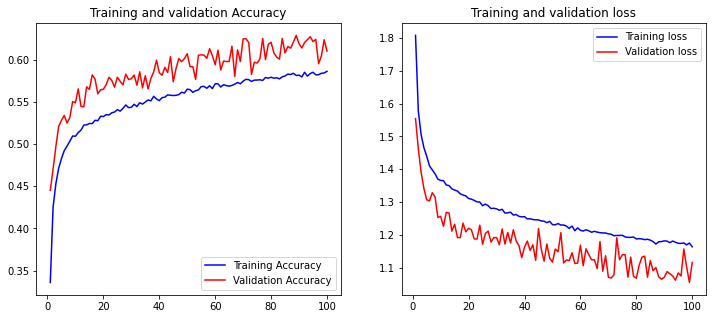

In [34]:
plot_history(history)

Carregar o melhor modelo que obteve a melhor acurácia de validação no treinamento

In [28]:
model = load_model("./modelo_mlp_ex6.hdf5")

### 8. Cálculo da precisão de classificação no dataset de treino e teste

In [29]:
scores = model.evaluate(x_train, y_train)
print()
print(f"Acuracia do Treino: {round(scores[1]*100,2)}%")

1407/1407 [==============================] - 3s 2ms/step - loss: 0.4769 - accuracy: 0.8472

Acuracia do Treino: 84.72%


Avaliar e imprimir a precisão do teste

In [30]:
scores = model.evaluate(x_test, y_test)
print()
print(f"Acuracia do Teste: {round(scores[1]*100,2)}%")

313/313 [==============================] - 1s 2ms/step - loss: 0.9249 - accuracy: 0.6805

Acuracia do Teste: 68.05%


### 9. Visualizar algumas predições

As visualizações podem nos dar algumas dicas sobre por que a rede classifica erroneamente alguns objetos.
Obtendo previsões no conjunto de testes:

In [62]:
y_hat = model.predict(x_test)

In [63]:
y_hat[100,:]

array([1.2297994e-03, 2.5095523e-04, 1.3379213e-01, 9.9166580e-02,
       3.8430592e-01, 1.7323694e-01, 1.5910935e-02, 1.9115117e-01,
       1.3798728e-04, 8.1754179e-04], dtype=float32)

In [64]:
y_hat_classes = model.predict_classes(x_test)
y_hat_classes

array([3, 8, 8, ..., 5, 4, 7], dtype=int64)

In [65]:
y_hat_classes[100]

4

Definindo rótulos de texto (rótulos disponíveis na fonte original: https://www.cs.toronto.edu/~kriz/cifar.html)

In [66]:
cifar10_labels = ['avião', 'carro', 'passaro', 'gato', 'cervo', 'cachorro', 'sapo', 'cavalo', 'navio', 'caminhão']

Plot de amostra aleatória de imagens de teste, rótulos preditos e a "ground truth" advinda do dataset CIFAR-10

In [67]:
idx = 1
pred_idx = np.argmax(y_hat[1])
true_idx = np.argmax(y_test[1])

print(pred_idx, true_idx)

8 8


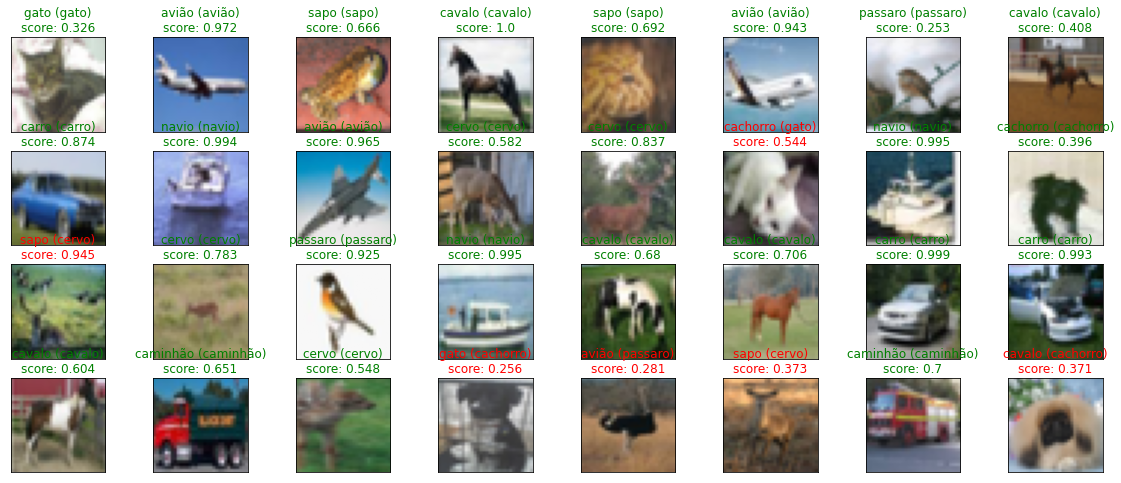

In [70]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    pred_proba = y_hat[idx][pred_idx]
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})\nscore: {:.3}".format(cifar10_labels[pred_idx], cifar10_labels[true_idx], pred_proba),
                 color=("green" if pred_idx == true_idx else "red"))
    # amostras corretamente classificadas em verde, incorretamente classificadas em vermelho
